# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Импорт библиотек**

In [6]:
import pandas as pd

Данные разделены не привычном способом, использую sep='\t'

In [7]:
data = pd.read_csv( '/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns = 22

Взгялну на данные

In [8]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [9]:
data.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод** 
- Вижу пропущенные значения во многих столбцах (причем имеют разное кол-во, где-то можно убрать пропуски в силу их малого количества, а где-то придется поработать над их качеством)
- Не правильный тип данных, например is_apartment и first_day_exposition
- В табице также видны аномальные значения в виде высоты потолка 100м и 60 этажном доме
- Признаки названы правильно 


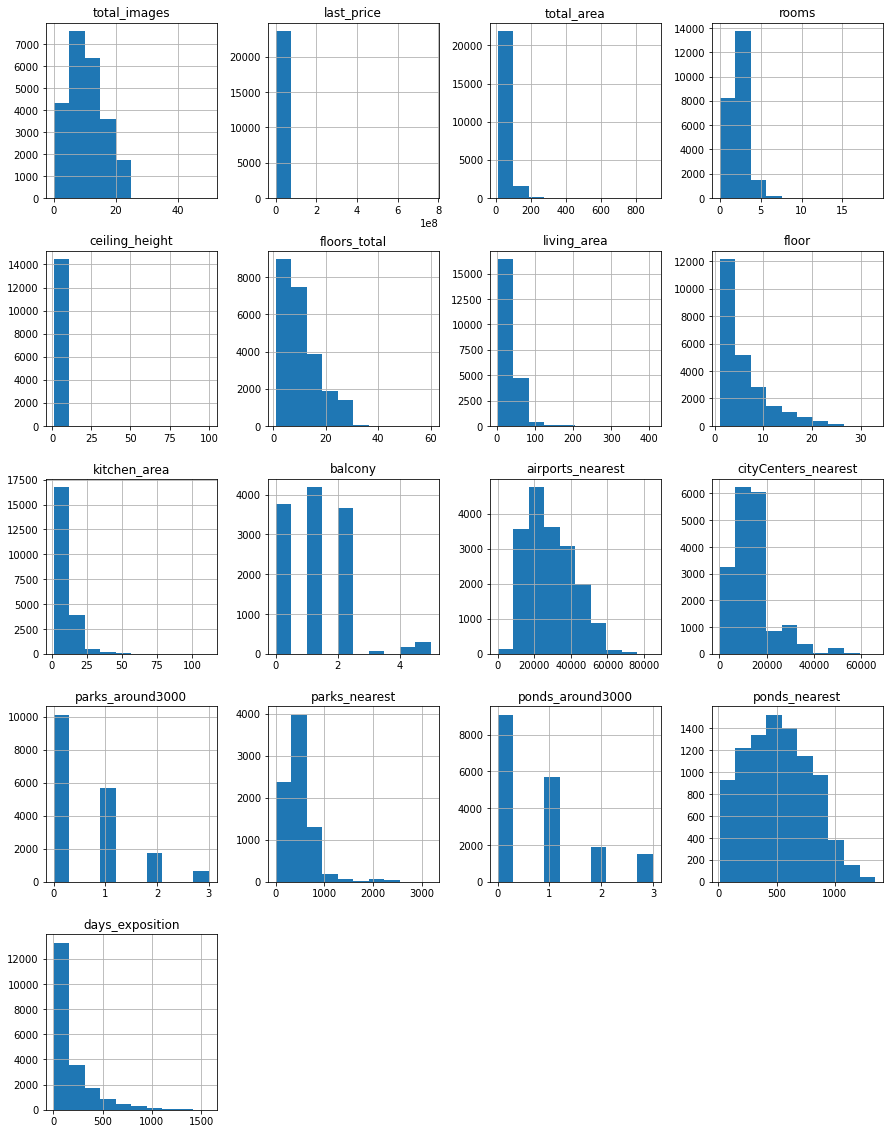

In [13]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [7]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000', 'studio':'is_studio', 'open_plan':'is_open_plan'})


Сменил некоторые названия столбцов для подведения названий под один стиль

In [8]:
data.isna().sum().sort_values()

total_images                0
is_open_plan                0
floor                       0
rooms                       0
is_studio                   0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**Мнение по пропускам** Думаю, многие пропуски обусловлены тем, что людям может быть лень заполнять расстояние до объектов, или же, скорее всего они могут этого не знать и не сочли важным

 если не указаны балконы - то, скорее всего их просто нет, так и запшем

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

locality_name - слишкм малый процент, результаты этих строк никак не повлияют на вывод, да и на потенциальных покупателей. Тоже самое касается кол-во этажей, пропусков всего 86

In [10]:
data = data.dropna(subset=['locality_name'])

data = data.dropna(subset=['floors_total'])

Теперь будем смотреть на статусы


In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
is_studio                   0
is_open_plan                0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Интересует только is_apartment, на этот раз пропусков очень много, игнорировать их нельзя. Попробуем воспользовваться тем же методом, что и с балконами - если не заполнено, то их нет, в этом случае False, допустим что все это обычные квартиры
  

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
is_open_plan                0
is_apartment                0
floor                       0
is_studio                   0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
living_area              1865
kitchen_area             2222
days_exposition          3171
parks_around_3000        5500
ponds_around_3000        5500
city_centers_nearest     5501
airports_nearest         5524
ceiling_height           9084
ponds_nearest           14529
parks_nearest           15535
dtype: int64

In [13]:
median_replace_kitchen = data.groupby('total_area')['kitchen_area'].median()
for total in data['total_area'].unique():
    data.loc[(data['total_area'] == total) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_replace_kitchen[total]

median_replace_living = data.groupby('total_area')['living_area'].median()
for total in data['total_area'].unique():
    data.loc[(data['total_area'] == total) & (data['living_area'].isna()), 'living_area'] = median_replace_living[total]
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
is_open_plan                0
is_apartment                0
floor                       0
is_studio                   0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
living_area               133
kitchen_area              185
days_exposition          3171
parks_around_3000        5500
ponds_around_3000        5500
city_centers_nearest     5501
airports_nearest         5524
ceiling_height           9084
ponds_nearest           14529
parks_nearest           15535
dtype: int64

Выше я зполнил размеры кухни и living room(зала) по медиане в зависимости от общей площади квартиры

Оставшиеся пару строк можно исключить из анализа - они нам важны, слишком малый процент

In [14]:
data = data.dropna(subset=['kitchen_area'])
data = data.dropna(subset=['living_area'])
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
kitchen_area                0
is_open_plan                0
is_apartment                0
floor                       0
is_studio                   0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
days_exposition          3148
parks_around_3000        5399
ponds_around_3000        5399
city_centers_nearest     5400
airports_nearest         5423
ceiling_height           8921
ponds_nearest           14370
parks_nearest           15336
dtype: int64

Другие пропуски я думал заполнить медианными значениями по городам, но как мне кажется это не отпимальный способ, ведь если допустить что город будет как окружность - да, там можно найти среднее расстояние до центра, но по форме города мы ничего не знаем, если он необычной формы, также учитывая что центр может находится ближе к одной стороне города, ведь зачастую центр города не буквально центр, то данные могут быть искожены. Касается это и парков и водоемов

Насчет высоты до потолка тоже не ясно, в наборе данных нет вариантов, на основе которых можно выявить среднее значение, города, расстояние до чего либо, кол-во комнот не являются показателями для этого. Наверное, чуть больше роль играет кол-во этажай в здании, но в данном случае, я считаю, что лучше пропустить это и оставить таким.

Думаю, тут можно закончить работу с пропусками

**Тип данных**

Обнаружил неверный тип данных в столбцах

first_day_exposition - должен быть тип DateTime, тк нам возможно пригодится работать с датами напрямую

floors_total - вещественным быть никак не может          
is_apartment - да или нет, bool        
balcony - вещественным быть не может       
days_exposition - целое кол-во дней      

Однако, в связи с тем, что не везде были обработаны пропуски, я не могу изменить тип данных в 2 столбцах, ведь нет оснований запонять пропуски в столбце days_exposition

In [15]:
data['balcony'] = data['balcony'].astype('int')

data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23290 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23290 non-null  int64         
 1   last_price            23290 non-null  float64       
 2   total_area            23290 non-null  float64       
 3   first_day_exposition  23290 non-null  datetime64[ns]
 4   rooms                 23290 non-null  int64         
 5   ceiling_height        14369 non-null  float64       
 6   floors_total          23290 non-null  float64       
 7   living_area           23290 non-null  float64       
 8   floor                 23290 non-null  int64         
 9   is_apartment          23290 non-null  bool          
 10  is_studio             23290 non-null  bool          
 11  is_open_plan          23290 non-null  bool          
 12  kitchen_area          23290 non-null  float64       
 13  balcony         

Разбираемся с **дубликатами**

In [16]:
data.duplicated().sum()

0

явных нет, зато в столбце с названиями есть неянвые

In [17]:
print(len(sorted(data['locality_name'].unique())))

363


In [18]:
for world in data['locality_name'].unique():
    if 'поселок' in world:
        new_world = world.replace('поселок', 'посёлок')
        data['locality_name'] = data['locality_name'].replace(world, new_world) 
        
    
len(sorted(data['locality_name'].unique()))

                   



329

### Добавлю новые признаки

**цена одного квадратного метра**

In [19]:
data['pritce_square_meter'] = data['last_price'] / data['total_area']

**день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [20]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday


**месяц публикации объявления**

In [21]:
data['month'] = data['first_day_exposition'].dt.month

**год публикации объявления**

In [22]:
data['year'] = data['first_day_exposition'].dt.year


**тип этажа квартиры (значения — «‎первый», «последний», «другой»);**

In [23]:
data['type_of_floor'] = 'другой'
data['type_of_floor'] = data['type_of_floor'].where(data['floor'] > 1, 'первый')
data['type_of_floor'] = data['type_of_floor'].where(data['floor'] < data['floors_total'], 'последний')

**расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).**

In [24]:
data['city_centers_nearest'] = data['city_centers_nearest'].where(data['city_centers_nearest'].isna(), data['city_centers_nearest'] / 1000)


**Рассмторим модернизированную таблицу**

In [25]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,pritce_square_meter,day_of_week,month,year,type_of_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,...,16.028,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,...,18.603,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,...,13.933,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,95.00,9,False,False,...,6.800,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,...,8.098,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,...,19.143,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,44.30,22,False,False,...,11.634,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,...,15.008,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой


In [26]:
data.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,pritce_square_meter,day_of_week,month,year,type_of_floor
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.5,3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,33439.490446,1,9,2018,другой
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,False,...,11.459,0.0,NaN,0.0,NaN,NaN,147586.206897,4,11,2018,другой
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,False,...,51.818,0.0,NaN,0.0,NaN,NaN,80322.580645,3,1,2019,последний
23686,8,3300000.0,31.00,2017-04-29,1,2.55,9.0,18.0,6,False,False,...,11.602,1.0,140.0,1.0,317.0,193.0,106451.612903,5,4,2017,другой
23687,6,3200000.0,39.00,2017-12-16,1,NaN,9.0,20.0,6,False,False,...,16.704,0.0,NaN,0.0,NaN,38.0,82051.282051,5,12,2017,другой
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15.0,63.0,12,False,False,...,14.428,0.0,NaN,0.0,NaN,23.0,91089.108911,0,4,2019,другой
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,False,...,16.081,1.0,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другой
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,False,False,...,6.263,1.0,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,False,...,4.489,0.0,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.5,4,False,False,...,NaN,NaN,NaN,NaN,NaN,413.0,45000.000000,4,7,2017,другой


In [27]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,pritce_square_meter,day_of_week,month,year
count,23290.000000,2.329000e+04,23290.000000,23290.000000,14369.000000,23290.00000,23290.000000,23290.000000,23290.000000,23290.000000,17867.000000,17890.000000,17891.000000,7954.000000,17891.000000,8920.000000,20142.000000,2.329000e+04,23290.000000,23290.000000,23290.000000
mean,9.904079,6.486479e+06,60.162800,2.075655,2.770501,10.62705,34.524420,5.855646,10.429086,0.592787,28790.036996,14.210910,0.611648,489.968444,0.765860,519.028812,181.265912,9.918310e+04,2.566423,6.394118,2017.368184
std,5.683116,1.064312e+07,34.341993,1.070825,1.266473,6.57220,21.802869,4.854872,5.747876,0.959348,12644.477132,8.624698,0.802168,340.017789,0.936681,277.846488,219.842973,5.015644e+04,1.788626,3.491950,1.037901
min,0.000000,1.219000e+04,14.000000,0.000000,1.000000,1.00000,2.000000,1.000000,1.300000,0.000000,0.000000,0.181000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.510000,5.00000,18.700000,2.000000,7.000000,0.000000,18543.500000,9.257750,0.000000,288.000000,0.000000,294.000000,45.000000,7.643404e+04,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.00000,30.000000,4.000000,9.000000,0.000000,26752.000000,13.111500,0.000000,455.000000,0.000000,503.500000,96.000000,9.489856e+04,3.000000,6.000000,2017.000000
75%,14.000000,6.774440e+06,69.700000,3.000000,2.800000,16.00000,42.300000,8.000000,11.800000,1.000000,37247.000000,16.285000,1.000000,612.000000,1.000000,732.000000,232.000000,1.140351e+05,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.00000,409.700000,33.000000,112.000000,5.000000,84869.000000,65.968000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000


**Поработаем с выбросами**

Будем оснооваться на ящик с усами, где межквартильный размах покажет нам удолетворяющие показатели и выбросы, от которых мы хотим избавиться

In [28]:
def outliers(column):
    q1 = column.quantile(0.25)                 
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    filter = (column >= (q1 - 1.5*iqr)) & (column <= (q3 + 1.5*iqr))
    return column[filter]

def new_values(df, raw_data):
    df[raw_data] = outliers(data[raw_data])
 
raw_data = ['total_area', 'kitchen_area', 'living_area', 'ceiling_height', 'rooms', 'last_price', 'floor',
         'floors_total', 'city_centers_nearest', 'parks_nearest', 'airports_nearest', 'month', 'days_exposition']
new_values(data, raw_data)
print(data.describe())


       total_images    last_price    total_area         rooms  ceiling_height  \
count  23290.000000  2.127300e+04  22099.000000  23205.000000    13562.000000   
mean       9.904079  4.839930e+06     54.479608      2.053652        2.679305   
std        5.683116  2.202413e+06     19.252708      1.000177        0.184372   
min        0.000000  1.219000e+04     14.000000      0.000000        2.200000   
25%        6.000000  3.300000e+06     39.800000      1.000000        2.500000   
50%        9.000000  4.400000e+06     50.300000      2.000000        2.620000   
75%       14.000000  6.000000e+06     65.600000      3.000000        2.760000   
max       50.000000  1.175759e+07    114.200000      6.000000        3.230000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23259.000000  22464.000000  22410.000000  22026.000000  23290.000000   
mean      10.592674     31.654916      5.261044      9.414480      0.592787   
std        6.505873     13.877178

### Исследовательский анализ данных

Итак, от выбросов избавились, теперь посмотрим на интересующие данные в чистом виде

count    22099.000000
mean        54.479608
std         19.252708
min         14.000000
25%         39.800000
50%         50.300000
75%         65.600000
max        114.200000
Name: total_area, dtype: float64


<AxesSubplot:>

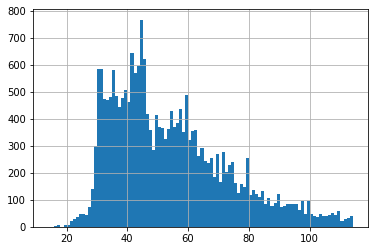

In [29]:
print(data['total_area'].describe())
data['total_area'].hist(bins=100)

**Вывод**

Видно, что пик популярности квартир - около 45кв^2, самый востребованный вариан - 54кв^2,к тому же идет резкое возростание при 25кв^2, а затем идет постепенный спад, с редкими проявлениями на популярность

count    22026.000000
mean         9.414480
std          3.058435
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

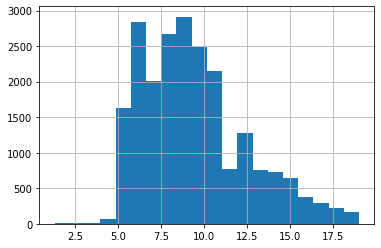

In [30]:
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=20)

**Вывод**

На графике так же виден резкий скачок от 5кв^2, самый популярный вариант - 9кв^2, в целом ожидаемый результат, в большинсве случаев кухни такого размера

count    22464.000000
mean        31.654916
std         13.877178
min          2.000000
25%         18.500000
50%         30.000000
75%         41.000000
max         77.610000
Name: living_area, dtype: float64


<AxesSubplot:>

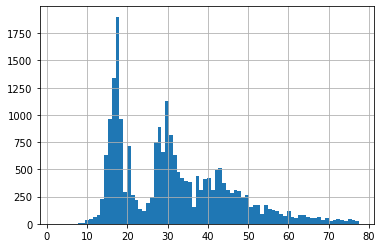

In [31]:
print(data['living_area'].describe())
data['living_area'].hist(bins=80)


**Вывод**

Тут интересный график, виден очень резкий подъем к 17кв^2, а затем такой же резкий спад и снова подъем к 30кв^2, 31кв^2 - в свою очередь и есть самый популярный вариант, то есть второй подъем не только резкий, но и более продолжительный, на графике тоже видно, что он толще

count    13562.000000
mean         2.679305
std          0.184372
min          2.200000
25%          2.500000
50%          2.620000
75%          2.760000
max          3.230000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

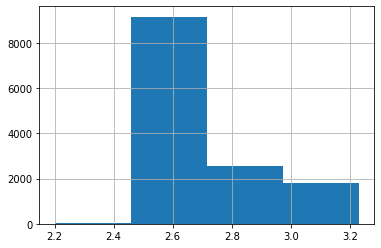

In [32]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=4)

**Вывод**

Что по графику, что по описанию видно, что в приоритете высота 2.6, затем идет спад до 3.2, выше - это только выбросы

count    23205.000000
mean         2.053652
std          1.000177
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


<AxesSubplot:>

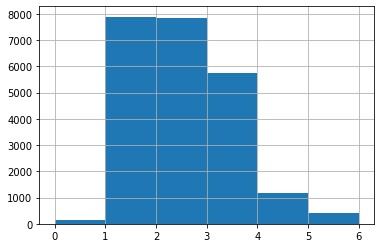

In [33]:
print(data['rooms'].describe())
data['rooms'].hist(bins=6)

**Вывод**

Определенно выскокий спрос на 1 и 2-комнатные квартиры, дальше - с ростом комнат, уменьшается спрос

count    2.127300e+04
mean     4.839930e+06
std      2.202413e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.175759e+07
Name: last_price, dtype: float64


<AxesSubplot:>

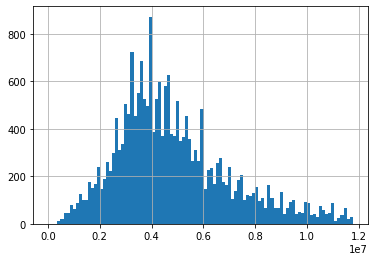

In [34]:
print(data['last_price'].describe())
data['last_price'].hist(bins=100)

**Вывод**

Медианная цена - 4 839 930р, а большинство квартир стоят до 6 000 000р

count    22410.000000
mean         5.261044
std          3.859189
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         17.000000
Name: floor, dtype: float64


<AxesSubplot:>

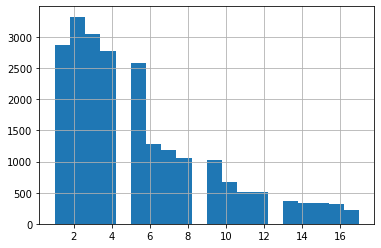

In [35]:
print(data['floor'].describe())
data['floor'].hist(bins=20)

**Вывод**

В среднем покупают квартиры на 5 этаже, причем на графике заметны пропуски в 3 местах, не думаю что это связано с не популярностью этих этажей, просто не нашлось продаж квартир на этажах в данных

count      23290
unique         3
top       другой
freq       17121
Name: type_of_floor, dtype: object


<AxesSubplot:>

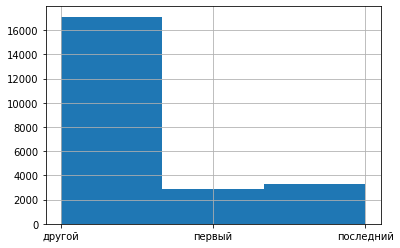

In [36]:
print(data['type_of_floor'].describe())
data['type_of_floor'].hist(bins=3)

**Вывод**

Как и ожидалось - Категория "Другой" популярнее, конечно это засчет кол-в входящих в эту категории данных, больше интересует тот факт, что с небольшим перевесом последний этаж популярнее первого

count    23259.000000
mean        10.592674
std          6.505873
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

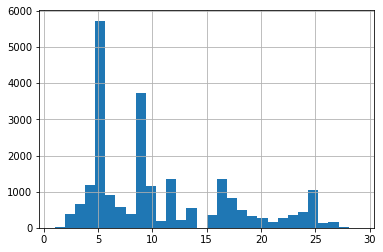

In [37]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins=30)

**Вывод**

Огромный и резкий пик - 5 этаж, самый толстый, а значит и медеанный столбей - этаж 10, логично, таких домов больше

count    16166.000000
mean        12.022467
std          5.140498
min          0.181000
25%          8.474000
50%         12.490000
75%         15.319000
max         26.805000
Name: city_centers_nearest, dtype: float64


<AxesSubplot:>

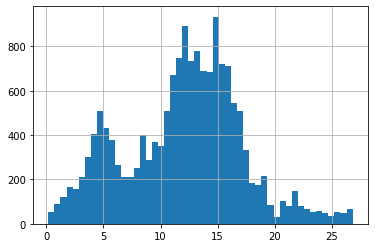

In [38]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins=50)

**Вывод**

По граифку видно, что про мед расстояние - 12км, на удивление много, большинсво квартир находятся не в близки центра, обычно доходит до 15км

count    23290.000000
mean         6.394118
std          3.491950
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


<AxesSubplot:>

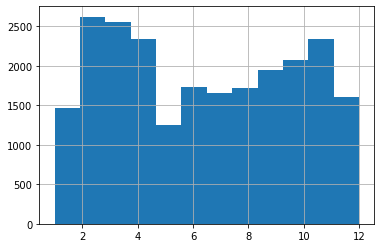

In [39]:
print(data['month'].describe())
data['month'].hist(bins=12)

**Вывод**

В среднем продажи идут в июне, а больше всего было в феврале

count    7649.000000
mean      440.549091
std       215.922396
min         1.000000
25%       281.000000
50%       441.000000
75%       592.000000
max      1098.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

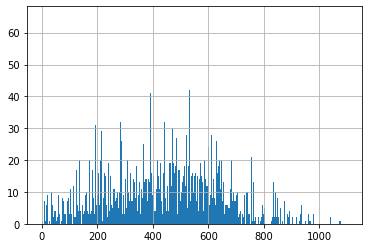

In [40]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=1000)

**Вывод**

От парка все дома находятся не очень далеко, большинсво не дохояд и до 500м, а максимум чуть больше 1км

count    17764.000000
mean        28.550340
std         12.277503
min          0.000000
25%         18.500000
50%         26.612000
75%         36.969000
max         65.254000
Name: airports_nearest, dtype: float64


<AxesSubplot:>

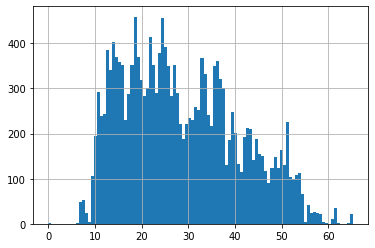

In [41]:
data['airports_nearest'] = data['airports_nearest'] / 1000#перевел в км, 
#потому что не удавалось построить график на всей обдасти, 
#диапазон бы сплишком большой, к тому же в км оцентку дать проще
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins=100)

**Вывод**

В среднем - 28км до ближайшего аэропорта, максимум 65, выгядит правдоподобно, график не вызывает подозрений


count    18500.000000
mean       129.057514
std        121.706361
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

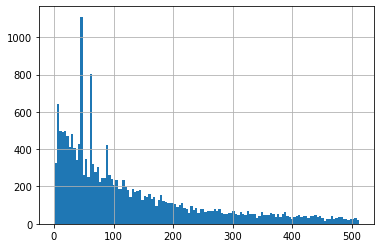

In [42]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=130)


**Вывод**

Теперь о продажах. продавать квартиру до 5 месяцев - норма, быстрой я бы назвал продажу до 3.5 месяцов, до 5 средняя, а вот 183 дня - это граница, все что больше - ужя долгая продажа квартиры, но не более, то что больше 500 дней - уже необычно долгая продажа 

**Теперь ищем связи**


,Тип связи,corr
0,good_total_area,0.690687
1,good_living_area,0.569047
2,good_kitchen_area,0.487797
3,good_rooms,0.446886


<AxesSubplot:xlabel='day_of_week'>

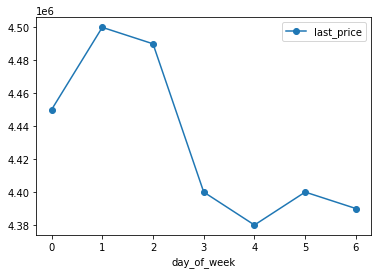

In [43]:
df_corr = pd.DataFrame({'Тип связи': ['good_total_area', 'good_living_area', 'good_kitchen_area', 'good_rooms', ], 
                   'corr': [data['total_area'].corr(data['last_price']), data['living_area'].corr(data['last_price']),
                            data['kitchen_area'].corr(data['last_price']), data['rooms'].corr(data['last_price']),]})
display(df_corr)

data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').plot(style='o-')


В общем виде, видем пик во вторник, а отрицательный пик в пятницу, видимо, тогда и идет основной спад цены. Не думаю, что в продажах как-то особенен именно вторник, думаю тут влияет старт недели - дни понедельник-среда явно имеют большую цену в публикации объявления

<AxesSubplot:xlabel='month'>

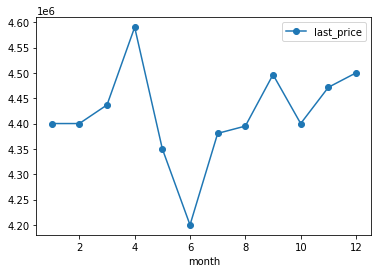

In [44]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(style='o-')

График показывает, что в седеине года идет сильный спад на цену квартир, возможно потомучу летом могут реже переезжать за счет того, что многие уезжают на отдых. В остальном, кроме мая цена не сильно меняется, выходи, что май - самый дорогой месяц, лучше подождать 2 месяца)

<AxesSubplot:xlabel='year'>

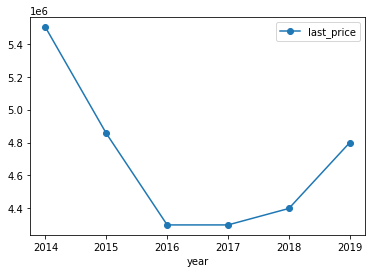

In [45]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(style='o-')

График есть график, по какой причине из резкого спада на 2 года, цена стало снова стремительно возрастать - не ясно, надо наюлюдать за новыми годами

<AxesSubplot:xlabel='type_of_floor'>

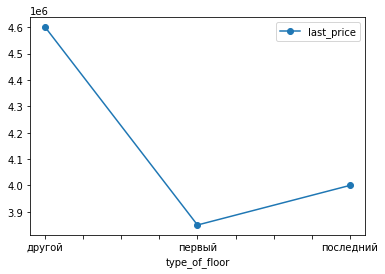

In [46]:
data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').plot(style='o-')

Тут ожидаемо, разные этажи, соответственно разные диапазон цен, поэтому цены будут выше, а последний этаж все же дороже первого

**Вывод**

- сильнее всего влияет итоговая площадь, но это не удивительна, ведь между площадью и ценой будет линейная зависимость, тут ничего новго
- дальше идут площади кухни и жилой зоны, но это просто часть от итоговой цены, тоже не интересно
- кол-во комнат имеет слабее связь, по сравнению с пунктами выше, однако, мне кажется это тоже больше связано с площадью
- день недели, месяц и год все же влияют на цену, найти логическую закономерность и сказать однозначно причину для года сложно, если говорить про дни - дороже в начале недели, а если про месяц - дополню предыдущий вывод: в июле может быть низкая цена из-за того, что в этом месяце больше всего продаж по медиане, судя по графике выше, где я показыал популярность в месяц
- этаж будет влияеть на цену, первый идет дешевле этажей повыше

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

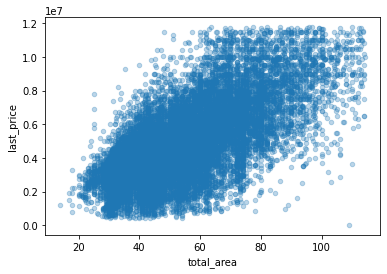

In [47]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3) 

**Вывод**

Данные напомнинают линейную функцию, как я писал выше, также тут заметна точна, котороая имеет большую пллщадь и низкую цену, вероятно ошибка, а может мошенники. В любом случае, она никак не влияет на статистику



<AxesSubplot:xlabel='living_area', ylabel='last_price'>

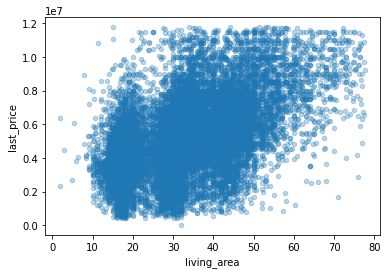

In [48]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3) 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

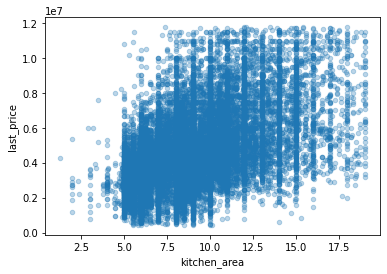

In [49]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3) 

Графики за площадь кухни и жилого помещения выглядят ожидаемо и соответсвуют моему описанию выше

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

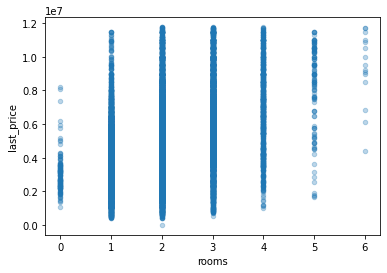

In [50]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3) 

Видно, что цена на 4 комнатные квартиры поднимается вверх, тоже касается на квартиры с большим количеством комнат 

<AxesSubplot:xlabel='day_of_week', ylabel='last_price'>

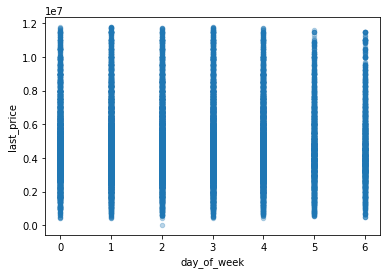

In [51]:
data.plot(x='day_of_week', y='last_price', kind='scatter', alpha=0.3) 

<AxesSubplot:xlabel='month', ylabel='last_price'>

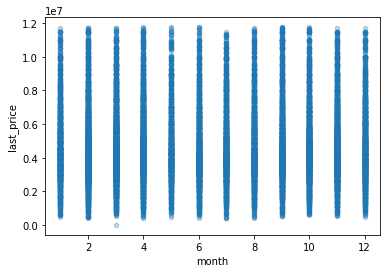

In [52]:
data.plot(x='month', y='last_price', kind='scatter', alpha=0.3) 

<AxesSubplot:xlabel='year', ylabel='last_price'>

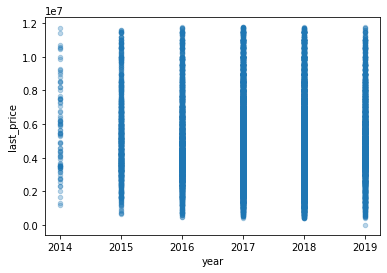

In [53]:
data.plot(x='year', y='last_price', kind='scatter', alpha=0.3) 

По дням недели и месяцам никакой закономерности нет, а в 2014 году было меньше продаж, но скорее это связано с числом строк, где год ровняется 2014, как я писал выше, тут никакой толковой связи нет

<AxesSubplot:xlabel='floor', ylabel='last_price'>

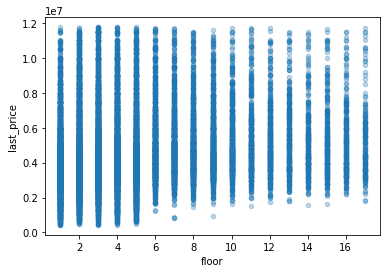

In [54]:
data.plot(x='floor', y='last_price', kind='scatter', alpha=0.3) 

Можно увидеть, как растет цена в зависимости от этажа, чем он больше, тем больше будет цена

<AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>

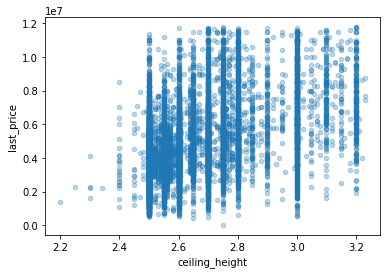

In [55]:
data.plot(x='ceiling_height', y='last_price', kind='scatter', alpha=0.3) 

Замечаем, что с ростом высоты потолка, у нас растет и цена за кв

Найдем топ 10 городов по кол-ву объявлений

In [56]:
locality=data['locality_name'].value_counts().sort_values(ascending=False).head(10)
locality

Санкт-Петербург      15480
посёлок Мурино         510
посёлок Шушары         439
Всеволожск             396
Пушкин                 366
Колпино                337
посёлок Парголово      326
Гатчина                307
деревня Кудрово        286
Выборг                 237
Name: locality_name, dtype: int64

Теперь займемся подсчетом в этих точках цена за 1кв^2


In [57]:
data['price_for_m^2'] = data['last_price'] / data['total_area']
print(
    data.query('locality_name in @locality.index')
    .pivot_table(index='locality_name', values='price_for_m^2', aggfunc='median')
    .sort_values('price_for_m^2')
    
)


                   price_for_m^2
locality_name                   
Выборг              58233.006089
Всеволожск          65789.473684
Гатчина             67796.610169
Колпино             74689.878234
посёлок Шушары      76747.967480
посёлок Мурино      84922.646605
деревня Кудрово     91666.666667
посёлок Парголово   91780.224134
Пушкин              98454.743209
Санкт-Петербург    101960.784314


Ожидаемо - Питер это самый дорогой город из базы данных, а Выборг самой дешевый

вычислим среднюю цену каждого километра в Питере

In [58]:
data['price_km'] = data['last_price'] / data['city_centers_nearest']
print(data.pivot_table(index = 'city_centers_nearest', values = 'price_km') / 1000000)

                       price_km
city_centers_nearest           
0.208                 27.884615
0.215                 51.116279
0.287                 33.414634
0.291                 39.518900
0.329                 21.884498
...                         ...
26.766                 0.091534
26.770                 0.085544
26.772                 0.192365
26.778                 0.123235
26.800                 0.162313

[6019 rows x 1 columns]


**Наглядано** видно, как цена падает по мере удаления квартиры от центра города

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_km'>

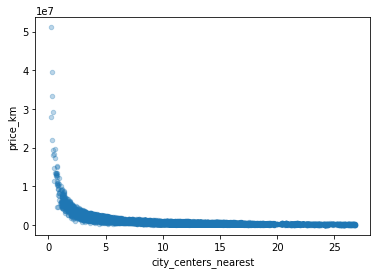

In [59]:
data.plot(x='city_centers_nearest', y='price_km', kind='scatter', alpha=0.3) 

**Вывод**

видно, что чем дальше расположена квартира - тем меньше цена за км, а значит на квартиру

### Общий вывод

Изначальные проблемы датасета и способы их исправить:

- При обработке пропусков отдавался приоритет в их заполнение, а не удаление
- Были исправелны типы данных для экономии места и возможности проводить с ними требуемые операции
- Созданы дополнительные столбцы для лучшего понимания данных в таблице и возможнотси предоставить более глубокий анализ

Что касается ответа на главный вопрос задачи

- Основным ориентиром для определения стоимости квартиры - это стоимость квадратного метра.
Понимание особенностей различных факторов поможет определить, какие типы квартир наиболее востребованы. Например, общая площадь, доля жилой площади от общей и доля кухонной площади от общей могут указать на предпочтения покупателей. Также, анализ данных о датах продаж позволит определить оптимальный момент для запуска рекламных компаний, учитывая месяцы или дни недели, когда спрос на недвижимость наиболее активен.

Информация о этаже квартиры также играет важную роль. Например, первые этажи редко пользуются популярностью из-за вопросов безопасности, а последние этажи могут вызвать беспокойство из-за потенциальных проблем с крышей. Следовательно, наибольший интерес чаще всего проявляется к комфортным квартирам, расположенным между первым и последним этажом.

Важным аспектом является также местоположение. Например, пригороды Санкт-Петербурга могут иметь более низкие цены из-за отсутствия статуса и престижности, в то время как недвижимость в центре города, обычно имеет более высокие цены благодаря удобному расположению и качественной планировке квартир.